<a href="https://colab.research.google.com/github/deepeshgrover/Third_Eye/blob/main/person_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Person identification using Transfer Learning

In [ ]:
import tensorflow as tf


import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
tf.__version__

'2.3.0'

Mount the persons dataset.

In [ ]:

!git clone https://github.com/deepeshgrover/Third_Eye.git

Cloning into 'Third_Eye'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 129 (delta 0), reused 0 (delta 0), pack-reused 107
Receiving objects: 100% (129/129), 137.08 MiB | 42.78 MiB/s, done.
Resolving deltas: 100% (8/8), done.


Use `ImageDataGenerator` to rescale the images.

Create the train generator and specify where the train dataset directory, image size, batch size.

Create the validation generator with similar approach as the train generator with the flow_from_directory() method.

In [ ]:
DataDir = '/content/Third_Eye/'



base_dir = os.path.join(os.path.dirname(DataDir), 'person_identification')

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training akhil pictures
train_akhil_dir = os.path.join(train_dir, 'Akhil')

# Directory with our training deepesh pictures
train_deepesh_dir = os.path.join(train_dir, 'Deepesh')

# Directory with our training Harsh pictures
train_harsh_dir = os.path.join(train_dir, 'Harsh')

# Directory with our training Mohit pictures
train_mohit_dir = os.path.join(train_dir, 'Mohit')





# Directory with our validation akhil pictures
validation_akhil_dir = os.path.join(validation_dir, 'Akhil')

# Directory with our validation deepesh pictures
validation_deepesh_dir = os.path.join(validation_dir, 'Deepesh')

# Directory with our validation harsh pictures
validation_harsh_dir = os.path.join(validation_dir, 'Harsh')

# Directory with our validation mohit pictures
validation_mohit_dir = os.path.join(validation_dir, 'Mohit')
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMAGE_SIZE = 224
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                              include_top=False, 
                                              weights='imagenet')
### Feature extraction
#You will freeze the convolutional base created from the previous step and use that as a feature extractor, 
#add a classifier on top of it and train the top-level classifier.
base_model.trainable = False
model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(4, activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 150x150
        batch_size=1,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=1,
        class_mode='categorical')

history = model.fit(
      train_generator,
      steps_per_epoch=75,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=40,  # 1000 images = batch_size * steps
      verbose=2)



Found 75 images belonging to 4 classes.
Found 40 images belonging to 4 classes.
Epoch 1/36
75/75 - 16s - loss: 2.3987 - accuracy: 0.4533 - val_loss: 1.7600 - val_accuracy: 0.3500
Epoch 2/36
75/75 - 15s - loss: 0.8007 - accuracy: 0.6000 - val_loss: 1.6174 - val_accuracy: 0.4500
Epoch 3/36
75/75 - 15s - loss: 0.5876 - accuracy: 0.6933 - val_loss: 1.3398 - val_accuracy: 0.6000
Epoch 4/36
75/75 - 15s - loss: 0.7025 - accuracy: 0.7200 - val_loss: 0.8816 - val_accuracy: 0.7250
Epoch 5/36
75/75 - 15s - loss: 0.5988 - accuracy: 0.7733 - val_loss: 0.9722 - val_accuracy: 0.7000
Epoch 6/36
75/75 - 15s - loss: 0.4889 - accuracy: 0.8533 - val_loss: 0.6906 - val_accuracy: 0.6500
Epoch 7/36
75/75 - 15s - loss: 0.4628 - accuracy: 0.8267 - val_loss: 1.1069 - val_accuracy: 0.6500
Epoch 8/36
75/75 - 15s - loss: 0.3663 - accuracy: 0.8667 - val_loss: 0.9044 - val_accuracy: 0.7250
Epoch 9/36
75/75 - 15s - loss: 0.2408 - accuracy: 0.8933 - val_loss: 1.3011 - val_accuracy: 0.7000
Epoch 10/36
75/75 - 15s - los

In [ ]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

((1, 224, 224, 3), (1, 4))

Save the labels in a file which will be downloaded later.

In [ ]:
print (train_generator.class_indices)

labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labels.txt', 'w') as f:
  f.write(labels)

{'Akhil': 0, 'Deepesh': 1, 'Harsh': 2, 'Mohit': 3}


In [ ]:
!cat labels.txt

Akhil
Deepesh
Harsh
Mohit

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 5, 5, 32)          368672    
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 132       
Total params: 2,626,788
Trainable params: 368,804
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
print('Number of trainable variables = {}'.format(len(model.trainable_variables)))

Number of trainable variables = 4


### Train the model

<!-- TODO(markdaoust): delete steps_per_epoch in TensorFlow r1.14/r2.0 -->

### Learning curves

Let's take a look at the learning curves of the training and validation accuracy/loss when using the MobileNet V2 base model as a fixed feature extractor. 

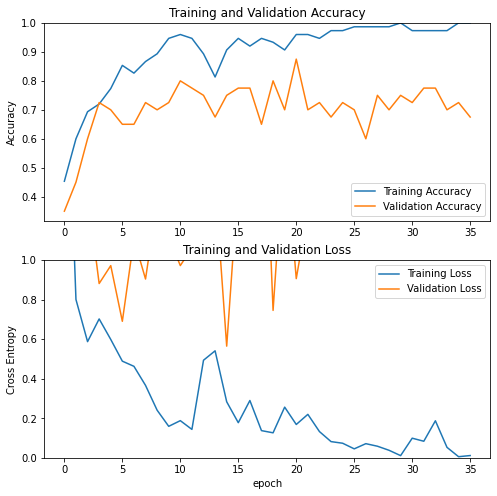

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## Convert to TFLite

Saved the model using `tf.saved_model.save` and then convert the saved model to a tf lite compatible format.

In [ ]:
saved_model_dir = 'save/fine_tuning'
tf.saved_model.save(model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: save/fine_tuning/assets


INFO:tensorflow:Assets written to: save/fine_tuning/assets


Download the converted model and labels

In [ ]:
from google.colab import files

files.download('model.tflite')
files.download('labels.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>